In [31]:
rm(list = ls())
library(caret)
library(boot)
library(stats)
library(dplyr)

n <- 100L

x1 <- rnorm(n, 2.0, 0.6)
x2 <- rnorm(n, -1.0, 2)
y <-  factor(rbinom(n, 1L, plogis(-0.6 + 1.0 * x1 - 0.8 * x2)))
dat <- data.frame(y, x1, x2)
dat  %>% head()

,y,x1,x2
,<fct>,<dbl>,<dbl>
1,1,2.500731,0.1997175
2,0,1.013708,-1.4383105
3,1,2.806743,-1.3560536
4,1,1.616698,-1.5941539
5,1,2.369401,-1.9584093
6,0,1.223139,0.2749070


In [32]:
caretMod <- train(y ~ ., 
                  data = dat, 
                  method = "knn",
                  trControl = trainControl(method = "none"))

caretMod

k-Nearest Neighbors 

100 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: None 

In [45]:
caretMod <- train(y ~ ., 
                  data = dat, 
                  method = "glmnet",
                  trControl = trainControl(method = "CV"),
                  tuneLength = 10)

caretMod

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

100 samples
  2 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (25 fold) 
Summary of sample sizes: 95, 97, 96, 96, 96, 97, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.1    0.0002034410  0.8666667  0.3501684
  0.1    0.0004699752  0.8666667  0.3501684
  0.1    0.0010857037  0.8666667  0.3501684
  0.1    0.0025081164  0.8666667  0.3501684
  0.1    0.0057940743  0.8746667  0.3564815
  0.1    0.0133850634  0.8880000  0.3774510
  0.1    0.0309212332  0.8800000  0.2291667
  0.1    0.0714320610  0.8720000  0.1666667
  0.1    0.1650173297  0.8560000  0.0000000
  0.2    0.0002034410  0.8666667  0.3501684
  0.2    0.0004699752  0.8666667  0.3501684
  0.2    0.0010857037  0.8666667  0.3501684
  0.2    0.0025081164  0.8666667  0.3501684
  0.2    0.0057940743  0.8746667  0.3564815
  0.2    0.0133850634  0.8880000  0.3774510
  0.2    0.0309212332  0.8800000  0.2291667
  0.2    0.0714320610  0.8720000  0.

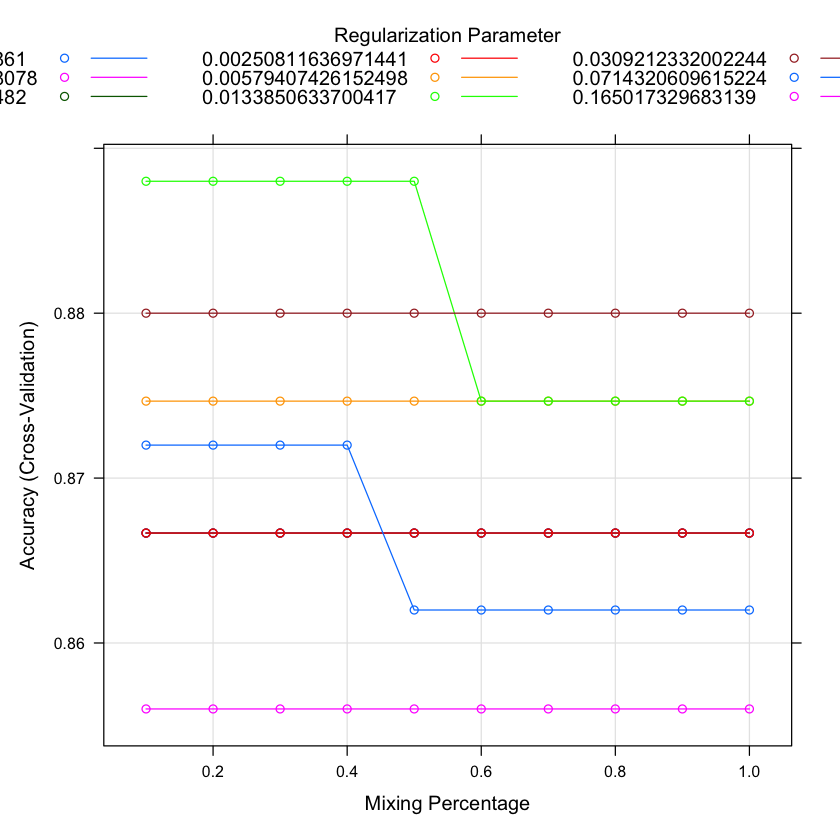

In [46]:
plot(caretMod)

In [47]:
tune = caretMod$bestTune

tune[,ncol(tune)]

[1] 0.01338506

In [48]:
bootSamples <- boot(dat, function(data, idx) {


  bootstrapMod <- train(y ~ ., 
                        data = data[idx, ], 
                        method = "glmnet", 
                        trControl = trainControl(method = "none"),
                        tuneGrid = tune)
  
  as.vector(coef(bootstrapMod$finalModel, tune[,ncol(tune)]))
}, 100L,ncpus=4)

bootSamples


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = dat, statistic = function(data, idx) {
    bootstrapMod <- train(y ~ ., data = data[idx, ], method = "glmnet", 
        trControl = trainControl(method = "none"), tuneGrid = tune)
    as.vector(coef(bootstrapMod$finalModel, tune[, ncol(tune)]))
}, R = 100, ncpus = 4)


Bootstrap Statistics :
      original      bias    std. error
t1*  0.1020497 -0.19413262   1.0059541
t2*  0.8147873  0.15593610   0.5312529
t3* -0.8021909 -0.01758602   0.1621210